<a href="https://colab.research.google.com/github/mahin-arvind/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING./blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
path = '/content/drive/MyDrive/Datasets/Unsupervised/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

INFORMATION: COLUMN NAMES, MISSING VALUES AND DATA TYPES

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


COLUMNS


In [46]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

DATASET SUMMARY

In [47]:
df.describe(include = 'O').T

count unique                                                top  \
show_id      7787   7787                                                 s1   
type         7787      2                                              Movie   
title        7787   7787                                                 3%   
director     5398   4049                             Raúl Campos, Jan Suter   
cast         7069   6831                                 David Attenborough   
country      7280    681                                      United States   
date_added   7777   1565                                    January 1, 2020   
rating       7780     14                                              TV-MA   
duration     7787    216                                           1 Season   
listed_in    7787    492                                      Documentaries   
description  7787   7769  Multiple women report their husbands as missin...   

             freq  
show_id         1  
type         5377  
title           1  
director       18  
cast           18  
country      2555  
date_added    118  
rating       2863  
duration     1608  
listed_in     334  
description     3

In [48]:
df.describe().T

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

MISSING VALUES

In [49]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [50]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown director', inplace=True)
df['cast'].fillna('unknown cast', inplace=True)
df['country'].fillna('unknown country', inplace=True)
df['date_added'].fillna('unknown date_added', inplace=True)
df['rating'].fillna('unknown rating', inplace=True)

CONVERTING 'date_added' to datetime format

In [51]:
import datetime as dt

In [52]:
def date(row):
  a = row['date_added']
  if 'unknown date_added' not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)


##**Exploratory Data Analysis**

### **Histogram plot of release dates of shows/movies on Netflix**

<Figure size 1008x576 with 0 Axes>

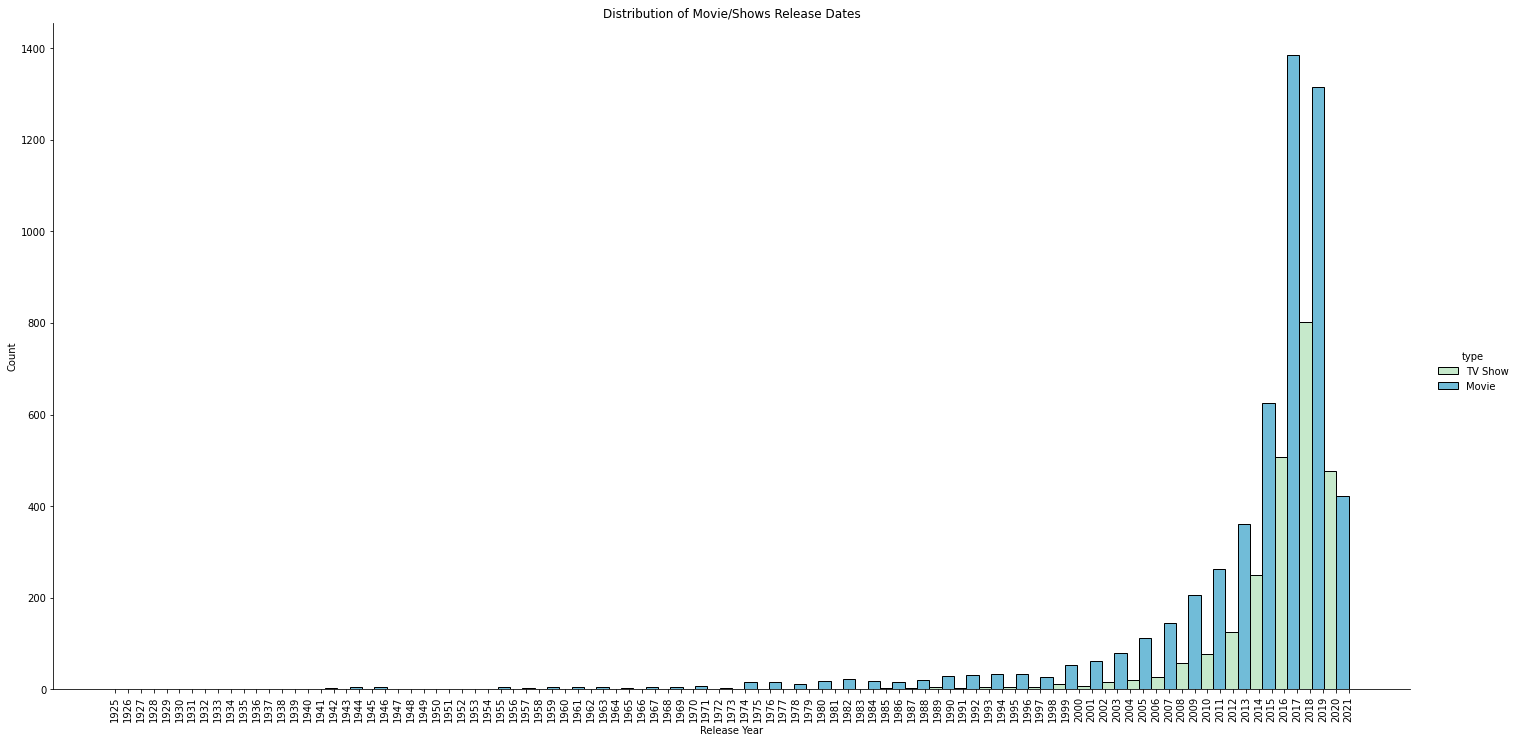

In [53]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

####**OBSERVATIONS**
> * **Most Movies streaming on the platform were released after 2010**
> * **Most  TV Shows streaming on the platform were released after 2015**
> * **The year 2017 had highest number of Movie and TV show releases on the platform**

In [54]:
df['date_added'].dt.year.max()

2021.0

### **Histogram plot of dates of number of shows/movies added by the Streaming giant**

<Figure size 1008x576 with 0 Axes>

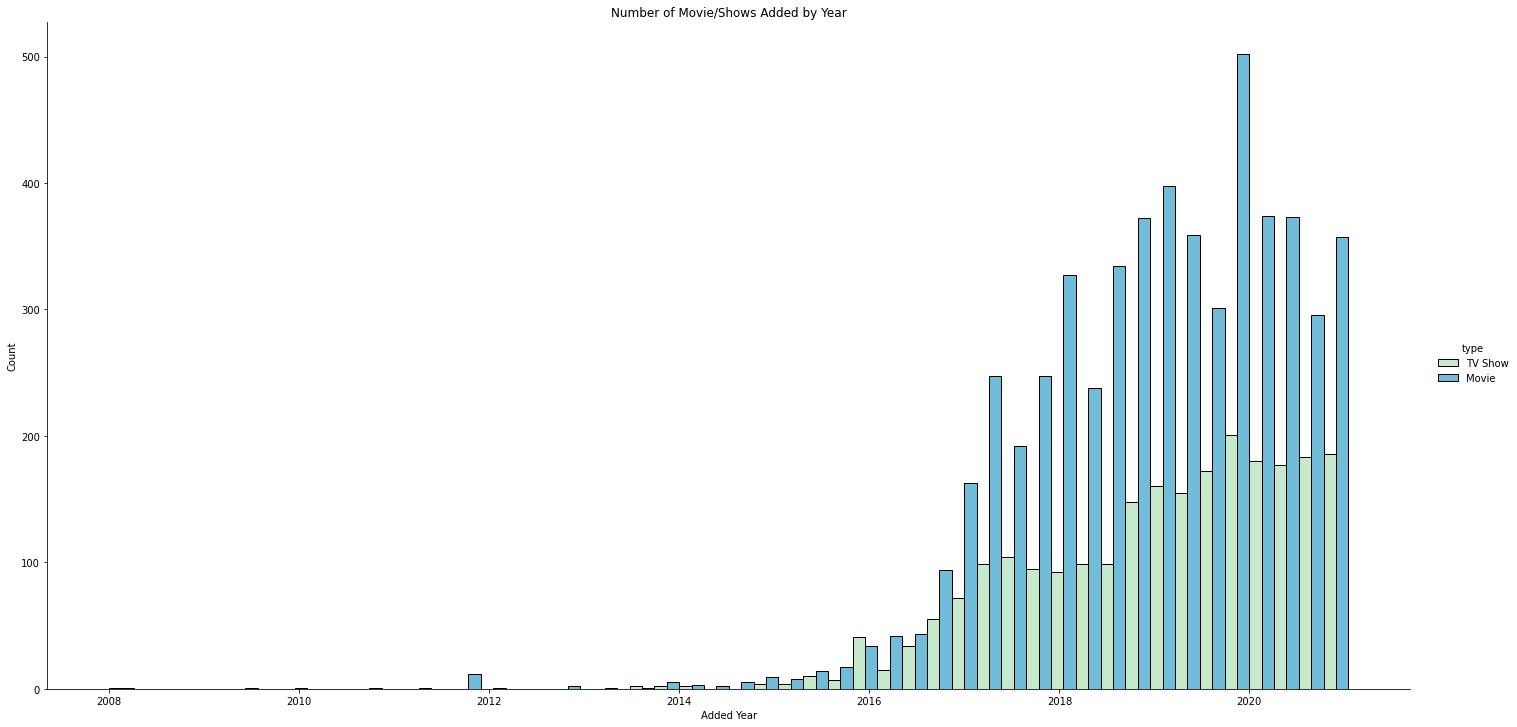

In [55]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

####**OBSERVATIONS**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

### **Type of Videos on Netflix**

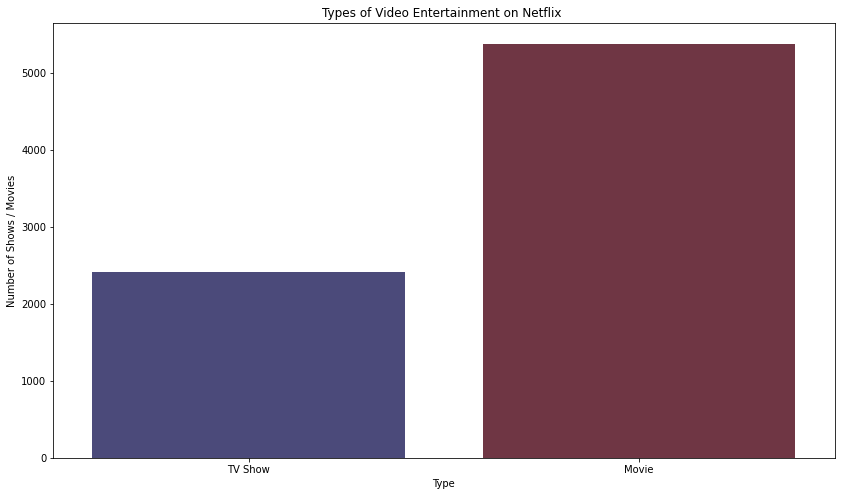

In [56]:
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

####**OBSERVATIONS**
> * **There are almost twice as many movies as TV shows on Netflix.**

### **Different Ratings on the Platform**

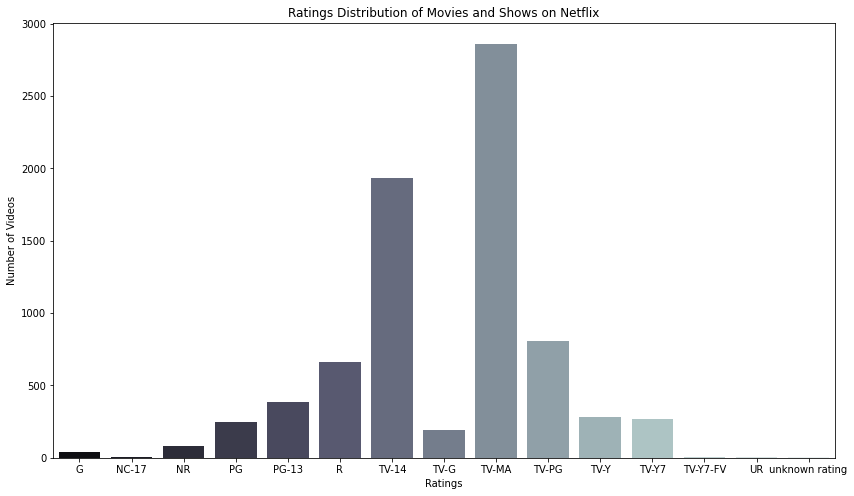

In [57]:
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

####**OBSERVATIONS**
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**

### **Top 10 Countries that produced content on Netflix**

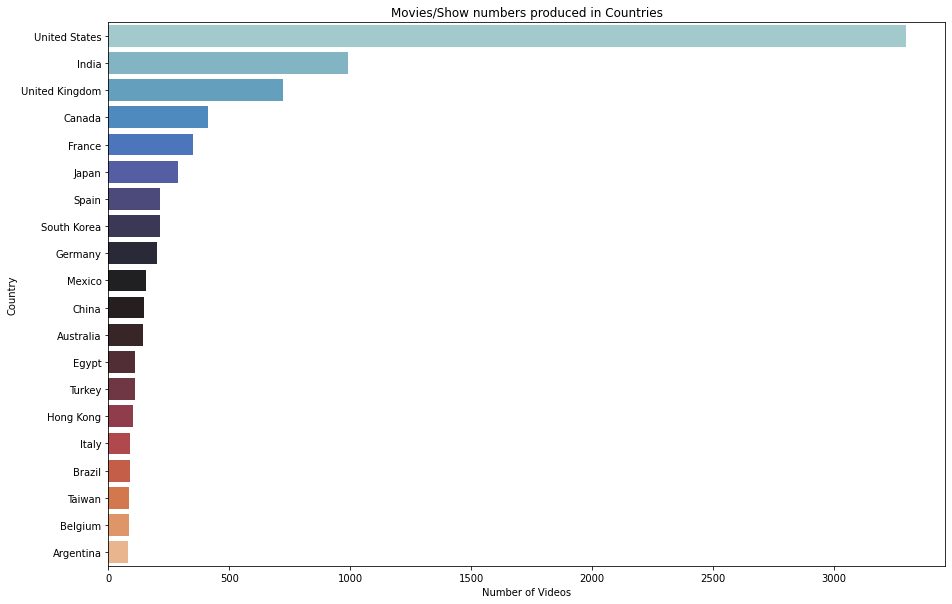

In [58]:
a = df[df.country != 'unknown country'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top5countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

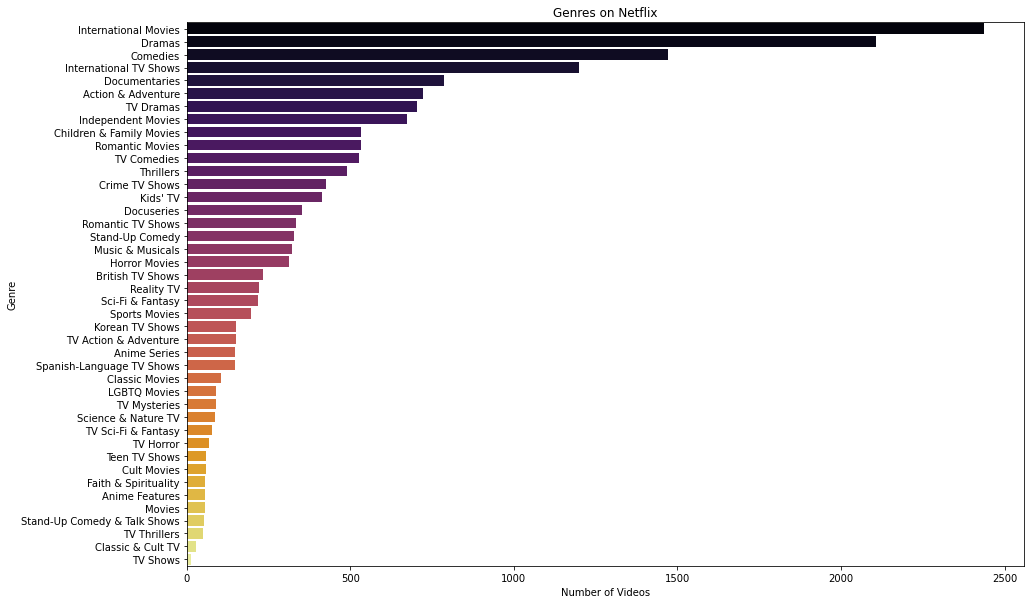

In [59]:
a = df.loc[:,['show_id','title','country', 'listed_in']].copy()
genrelist = (a['listed_in'].to_list())

newlist = []
for genre in genrelist:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Genre' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Genre').agg({'id':'count'}).sort_values('id', ascending= False).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Genre', x = 'id',data = a , palette='inferno')
a = plt.title('Genres on Netflix')
a = plt.ylabel('Genre')
a = plt.xlabel('Number of Videos')
top5genres = country_list.groupby('Genre').agg({'id':'count'}).sort_values('id', ascending= False).head(15).reset_index()['Genre'].unique()

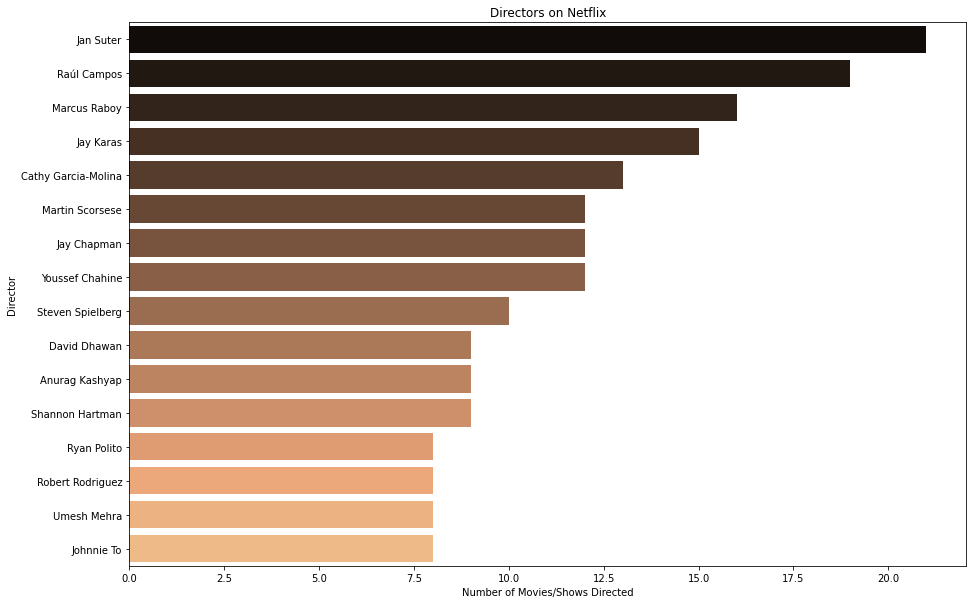

In [60]:
a=df[df.director != 'unknown director'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(16)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')

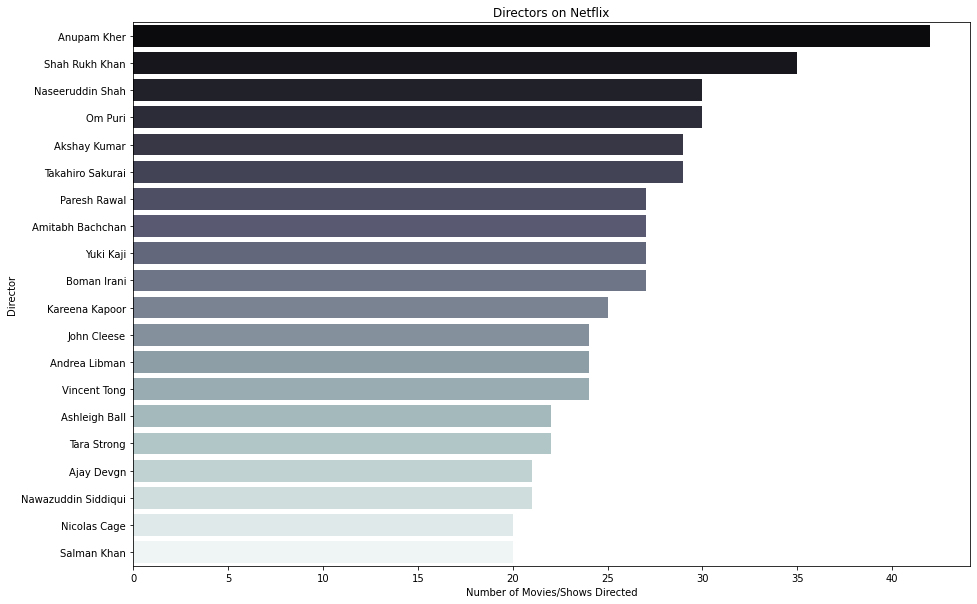

In [61]:
a=df[df.cast != 'unknown cast'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'id',data = a , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')

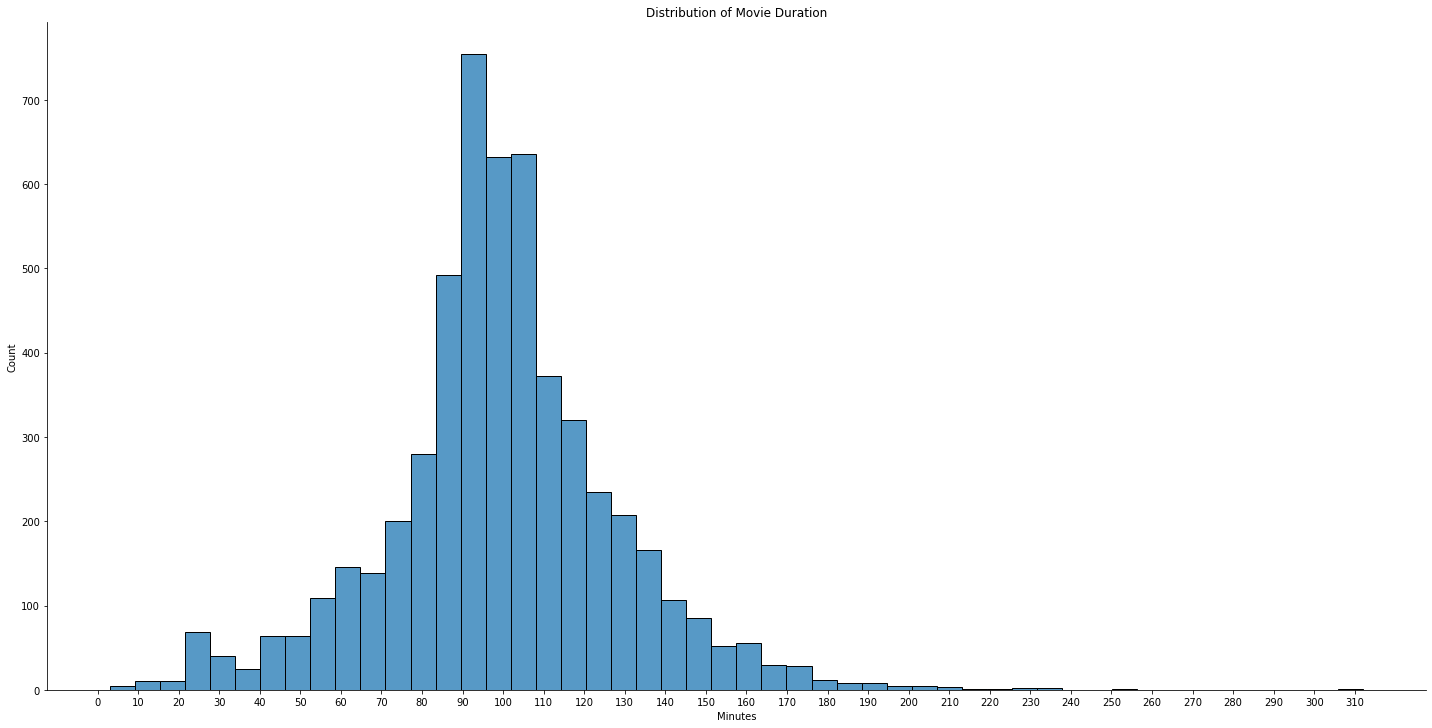

In [62]:
a=df[df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

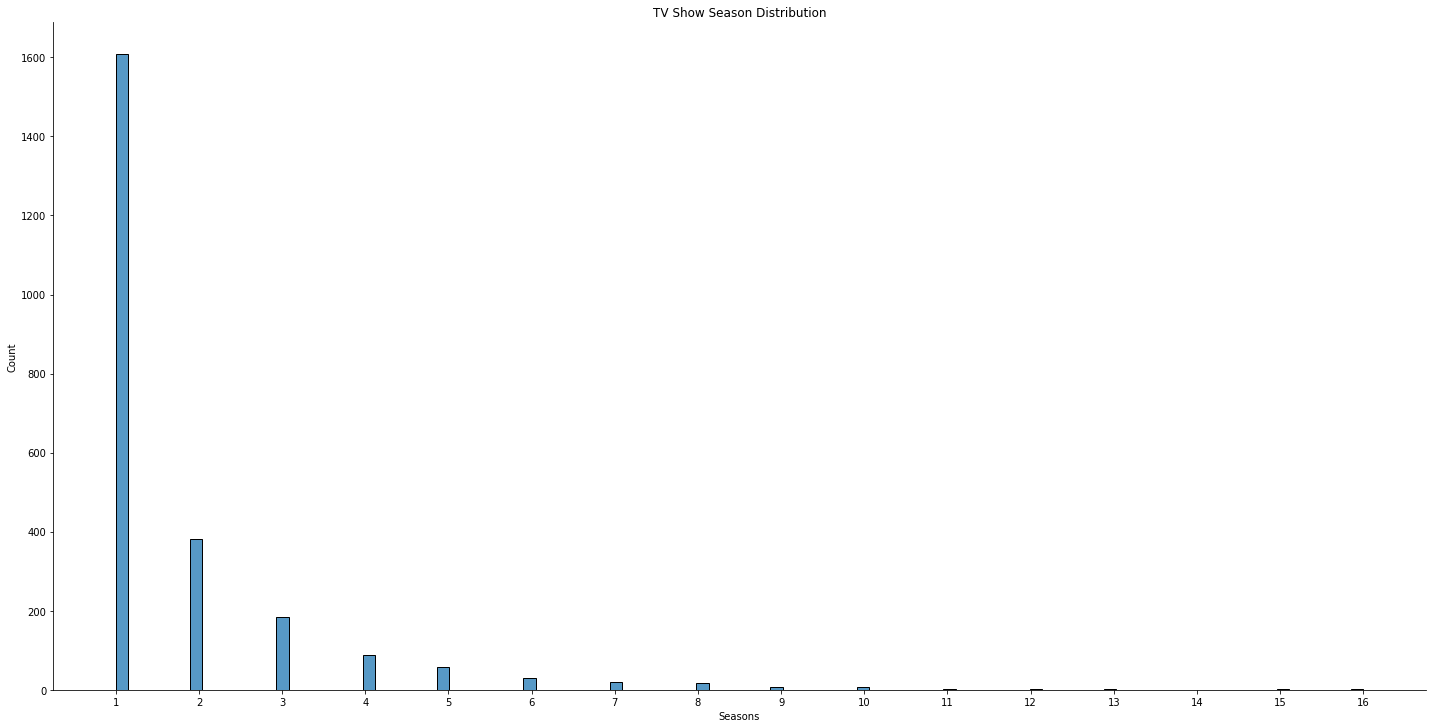

In [63]:
a=df[df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

#Content in Different countries

In [64]:
a = df[df['country'] != 'unknown country'].loc[:,['show_id','title','country','listed_in']].copy()

In [65]:
#function to convert string type to list 
def operation(row,string):
  return row[string].split(', ')
a['listed_in'] = a.apply(lambda x: operation(x,'listed_in'), axis = 1)
a['country'] = a.apply(lambda x: operation(x,'country'), axis = 1)

In [66]:
#explodes the list of categories and genres in each row to individual rows
a = a.explode('listed_in').explode('country')

In [67]:
a = a.groupby(['country','listed_in']).agg({'show_id':'count'}).reset_index() #table contains number of videos belonging to each genre from different countries

In [68]:
#function to return the indeces that contain the top10 countries with the top 10 genres viewed
def selectindex(row, attribute, list):
  b = row[attribute]
  boolean = b in list
  return boolean

index = a.apply(lambda x: selectindex(x, 'country',top5countries), axis = 1)
newindex = a[index].apply(lambda x: selectindex(x, 'listed_in',top5genres), axis = 1)

In [69]:
newdata = a[index][newindex] #data that contains the number videos in the top 15 genres in the top 10 countries

Text(0, 0.5, 'NUMBER OF SHOWS & MOVIES')

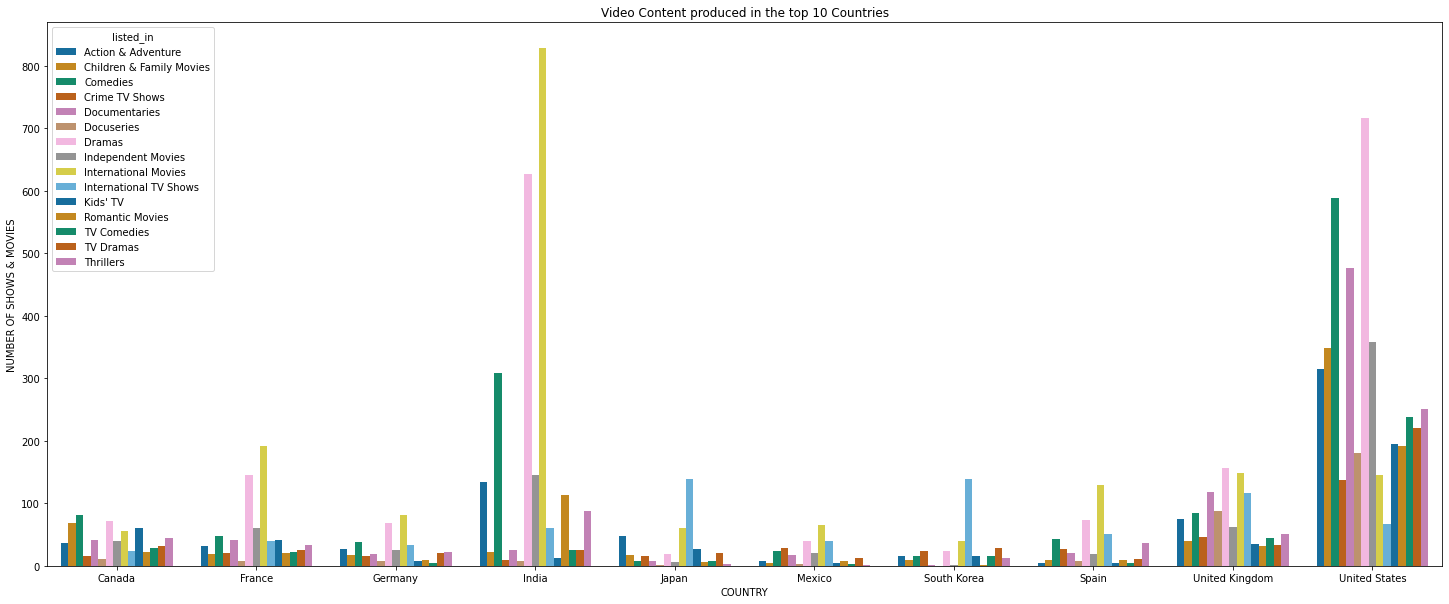

In [70]:
a = plt.figure(figsize=(25,10))
sns.barplot(x = newdata['country'], y = newdata['show_id'], hue = newdata['listed_in'], palette= 'colorblind' )
plt.title('Video Content produced in the top 10 Countries')
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF SHOWS & MOVIES')

#Has Netflix Been Focusing Increasingly on TV Shows as compared to movies

In [196]:
TV = df[df['type']!='Movie'].loc[:,['title','date_added','release_year', 'duration']].dropna().copy()
movies  = df[df['type']=='Movie'].loc[:,['title','date_added']].dropna().copy()

In [197]:
movies['date_added'] = movies['date_added'].dt.year
TV['date_added'] = TV['date_added'].dt.year

In [198]:
'''
assuming that a season releases once in every year, we'll be adding a copy for every year a season aired after the show was added
tv show added years = No.of Seasons - [Added Year - Release Year]
'''
TV['Seasons'] = TV['duration'].apply(lambda x: int(x.split(' ')[0]))

In [199]:
TV

title  date_added  release_year   duration  Seasons
0                        3%        2020          2020  4 Seasons        4
5                        46        2017          2016   1 Season        1
11                     1983        2018          2018   1 Season        1
12                     1994        2019          2019   1 Season        1
16                   Feb-09        2019          2018   1 Season        1
...                     ...         ...           ...        ...      ...
7767     Zindagi Gulzar Hai        2016          2012   1 Season        1
7775             Zoids Wild        2020          2018   1 Season        1
7777            Zombie Dumb        2019          2018  2 Seasons        2
7779              Zona Rosa        2019          2019   1 Season        1
7785  Zumbo's Just Desserts        2020          2019   1 Season        1

[2400 rows x 5 columns]

In [200]:
def airdates(row):
  seasons = row['Seasons']
  last_aired = row['release_year']
  airdates = []
  for i in range(0,seasons):
    airdates.append(last_aired - i)
  
  return airdates
TV['Possible Aired Dates'] = TV.apply(lambda row: airdates(row), axis =1)

In [201]:
def reneweddates(row):
  airdates = row['Possible Aired Dates']
  reneweddates = []
  for i in airdates:
    if int(i) >= int(row['date_added']):
      reneweddates.append(i) 
  if reneweddates == []:
    reneweddates.append(row['date_added'])
  return reneweddates
TV['Production Dates'] = TV.apply(lambda row: reneweddates(row), axis =1)  


In [207]:
TV.explode('Production Dates')

title  date_added  release_year   duration  Seasons  \
0                        3%        2020          2020  4 Seasons        4   
5                        46        2017          2016   1 Season        1   
11                     1983        2018          2018   1 Season        1   
12                     1994        2019          2019   1 Season        1   
16                   Feb-09        2019          2018   1 Season        1   
...                     ...         ...           ...        ...      ...   
7767     Zindagi Gulzar Hai        2016          2012   1 Season        1   
7775             Zoids Wild        2020          2018   1 Season        1   
7777            Zombie Dumb        2019          2018  2 Seasons        2   
7779              Zona Rosa        2019          2019   1 Season        1   
7785  Zumbo's Just Desserts        2020          2019   1 Season        1   

          Possible Aired Dates Production Dates  
0     [2020, 2019, 2018, 2017]             2020  
5                       [2016]             2017  
11                      [2018]             2018  
12                      [2019]             2019  
16                      [2018]             2019  
...                        ...              ...  
7767                    [2012]             2016  
7775                    [2018]             2020  
7777              [2018, 2017]             2019  
7779                    [2019]             2019  
7785                    [2019]             2020  

[2407 rows x 7 columns]

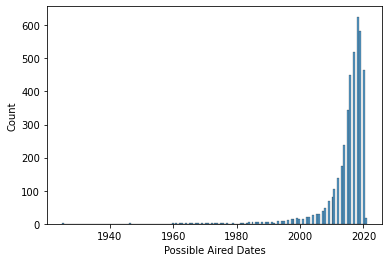

In [220]:
a = TV.explode('Possible Aired Dates').groupby('Possible Aired Dates').agg({'title':'count'}).reset_index()
sns.histplot(x = TV.explode('Possible Aired Dates').reset_index()['Possible Aired Dates'])

In [214]:
TV.groupby('date_added').agg({'title':'count'})

title
date_added       
2008            1
2013            5
2014            6
2015           30
2016          185
2017          361
2018          430
2019          656
2020          697
2021           29

#Early Insights

In [309]:
netflix = df.loc[:, ['title', 'description','director','cast', 'type','listed_in', 'country']].copy()

In [310]:
netflix

title  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783                                   Zubaan   
7784                        Zulu Man in Japan   
7785                    Zumbo's Just Desserts   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description           director  \
0     In a future where the elite inhabit an island ...   unknown director   
1     After a devastating earthquake hits Mexico Cit...  Jorge Michel Grau   
2     When an army recruit is found dead, his fellow...       Gilbert Chan   
3     In a postapocalyptic world, rag-doll robots hi...        Shane Acker   
4     A brilliant group of students become card-coun...     Robert Luketic   
...                                                 ...                ...   
7782  When Lebanon's Civil War deprives Zozo of his ...        Josef Fares   
7783  A scrappy but poor boy worms his way into a ty...        Mozez Singh   
7784  In this documentary, South African rapper Nast...   unknown director   
7785  Dessert wizard Adriano Zumbo looks for the nex...   unknown director   
7786  This documentary delves into the mystique behi...           Sam Dunn   

                                                   cast     type  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...  TV Show   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...    Movie   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...    Movie   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...    Movie   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...    Movie   
...                                                 ...      ...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...    Movie   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...    Movie   
7784                                            Nasty C    Movie   
7785                         Adriano Zumbo, Rachel Khoo  TV Show   
7786                                       unknown cast    Movie   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                                country  
0                                                Brazil  
1                                                Mexico  
2                                             Singapore  
3                                         United States  
4                                         United States  
...                                                 ...  
7782  Sweden, Czech Republic, United Kingdom, Denmar...  
7783                                              India  
7784                                    unknown country  
7785                                          Australia  
7786              United Kingdom, Canada, United States  

[7787 rows x 7 columns]

##Description

In [321]:
nf = netflix.loc[:,['title','description','type','director','listed_in']].copy()

###Tokenization

In [322]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

#Tokenization
import regex as re
def tokenize(text):
  return re.findall(r'[\w-]*\p{L}[\w-]*', text)


#Function to Remove Stop Words
def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]

#Text Processing Pipeline
'''
used with df.applymap or df.apply
Example : df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
'''
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
  tokens = text
  for transform in pipeline:
    tokens = transform(tokens)
  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [323]:
#preparing nf
nf['description'] = nf['description'].apply(prepare, pipeline = pipeline)

In [324]:
nf

title  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783                                   Zubaan   
7784                        Zulu Man in Japan   
7785                    Zumbo's Just Desserts   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description     type  \
0     [future, elite, inhabit, island, paradise, far...  TV Show   
1     [devastating, earthquake, hits, mexico, city, ...    Movie   
2     [army, recruit, found, dead, fellow, soldiers,...    Movie   
3     [postapocalyptic, world, rag-doll, robots, hid...    Movie   
4     [brilliant, group, students, become, card-coun...    Movie   
...                                                 ...      ...   
7782  [lebanon, civil, war, deprives, zozo, family, ...    Movie   
7783  [scrappy, poor, boy, worms, way, tycoon, dysfu...    Movie   
7784  [documentary, south, african, rapper, nasty, c...    Movie   
7785  [dessert, wizard, adriano, zumbo, looks, next,...  TV Show   
7786  [documentary, delves, mystique, behind, blues-...    Movie   

               director                                          listed_in  
0      unknown director  International TV Shows, TV Dramas, TV Sci-Fi &...  
1     Jorge Michel Grau                       Dramas, International Movies  
2          Gilbert Chan                Horror Movies, International Movies  
3           Shane Acker  Action & Adventure, Independent Movies, Sci-Fi...  
4        Robert Luketic                                             Dramas  
...                 ...                                                ...  
7782        Josef Fares                       Dramas, International Movies  
7783        Mozez Singh     Dramas, International Movies, Music & Musicals  
7784   unknown director  Documentaries, International Movies, Music & M...  
7785   unknown director                 International TV Shows, Reality TV  
7786           Sam Dunn                    Documentaries, Music & Musicals  

[7787 rows x 5 columns]

Frequently used words and phrases can give us some basic understanding of the discussed topics. The original
arrangement in the text is lost; only the frequency of the terms is taken into account.
This model does not work well for complex tasks such as sentiment analysis or question
answering, but it works surprisingly well for classification and topic modeling.

In [325]:
from collections import Counter
'''
The function takes, as a first parameter, a Pandas DataFrame and takes the column
name containing the tokens or the text as a second parameter. As we already stored
the prepared tokens in the column tokens of the DataFrame containing the speeches,
we can use the following two lines of code to compute the DataFrame with word frequencies
and display the top five tokens
  code : freq_df = count
'''

def count_words(df, column='description', preprocess=None, min_freq=2):
# process tokens and update counter
  def update(doc):
    tokens = doc if preprocess is None else preprocess(doc)
    counter.update(tokens)
  # create counter and run through all data
  counter = Counter()
  df[column].map(update)

  # transform counter into a DataFrame
  freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
  freq_df = freq_df.query('freq >= @min_freq')
  freq_df.index.name = 'token'
  return freq_df.sort_values('freq', ascending=False)



In [326]:
#count words
freq_df = count_words(nf, column = 'description')

### Frequency Diagram

[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

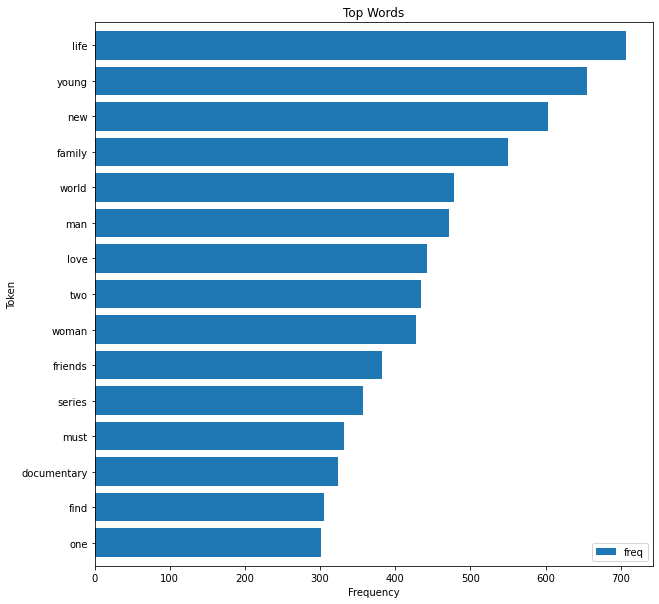

In [327]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize = (10,10))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

### Word Clouds

In [328]:
from wordcloud import WordCloud
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
  wc = WordCloud(width=800, height=400,
  background_color= "black", colormap="Paired",
  max_font_size=150, max_words=max_words)
  # convert DataFrame into dict
  if type(word_freq) == pd.Series:
    counter = Counter(word_freq.fillna(0).to_dict())
  else:
    counter = word_freq
  # filter stop words in frequency counter
  if stopwords is not None:
    counter = {token:freq for (token, freq) in counter.items()if token not in stopwords}
  wc.generate_from_frequencies(counter)
  plt.title(title)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")

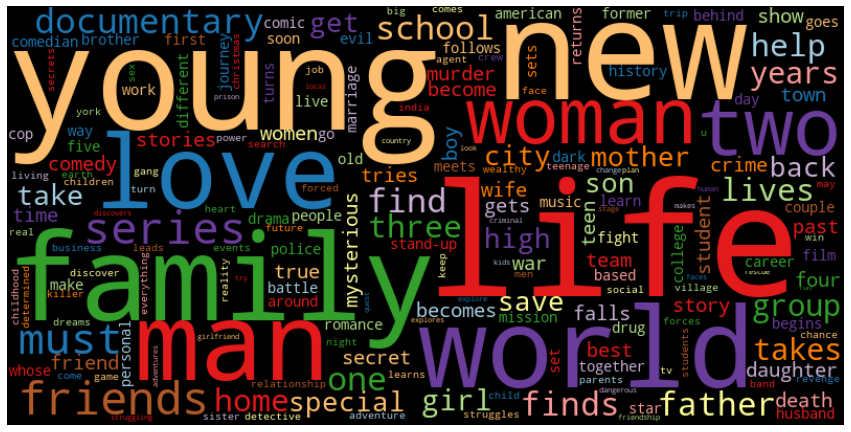

In [330]:
plt.figure(figsize=(15,10))
wordcloud(freq_df['freq'], max_words=200)

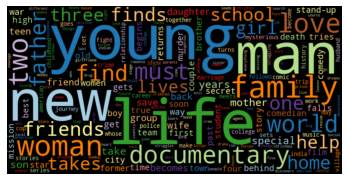

In [346]:
freq_2015_df = count_words(nf[nf['type']=='Movie'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

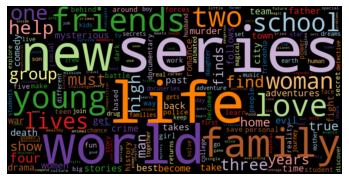

In [347]:
freq_2015_df = count_words(nf[nf['type']!='Movie'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

In [354]:
a = nf.copy()
a['listed_in'] = a.apply(lambda row: list(row['listed_in']).split(', '))
a = nf.explode('listed_in')


KeyError: ignored

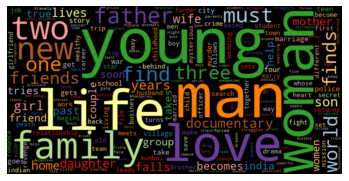

In [361]:
a = nf.copy()
def listconverter(row):
  a = row['listed_in']
  return a.split(', ')
a['listed_in'] = a.apply(lambda x: listconverter(x), axis =1)
a = a.explode('listed_in')
freq_2015_df = count_words(a[a['listed_in']=='International Movies'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

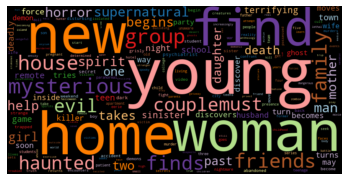

In [362]:
freq_2015_df = count_words(a[a['listed_in']=='Horror Movies'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

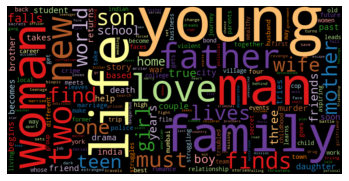

In [363]:
freq_2015_df = count_words(a[a['listed_in']=='Dramas'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

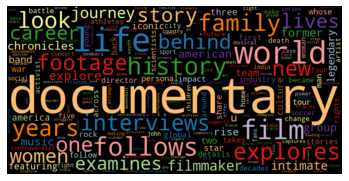

In [364]:
freq_2015_df = count_words(a[a['listed_in']=='Documentaries'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

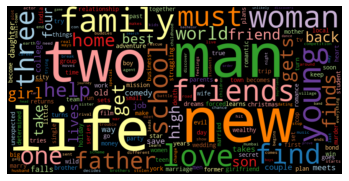

In [366]:
freq_2015_df = count_words(a[a['listed_in']=='Comedies'],column = 'description')
wordcloud(freq_2015_df['freq'], max_words=200)

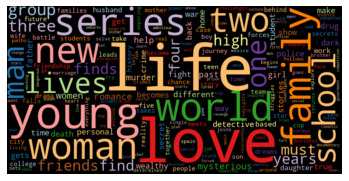

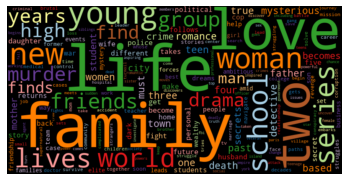

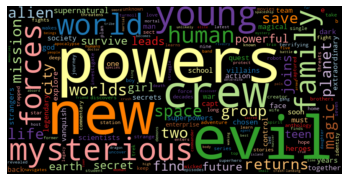

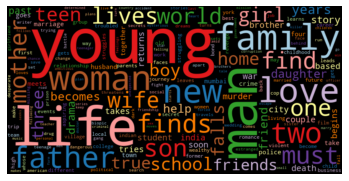

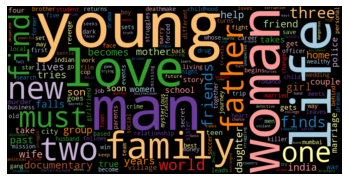

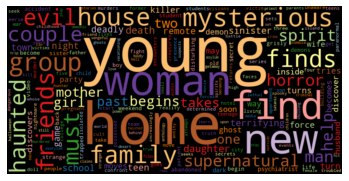

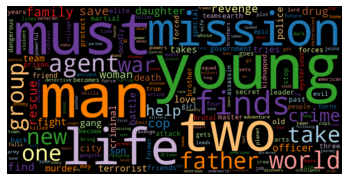

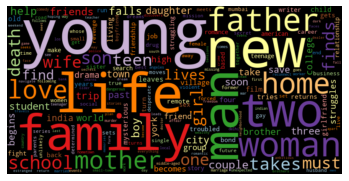

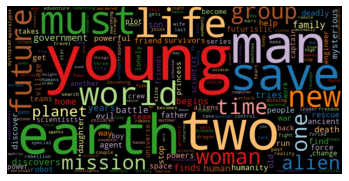

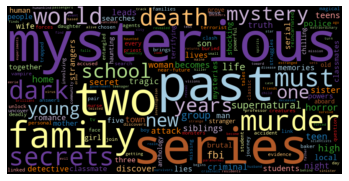

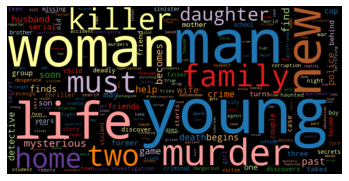

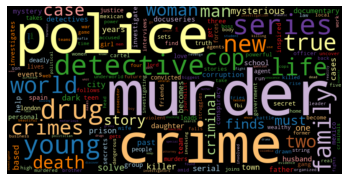

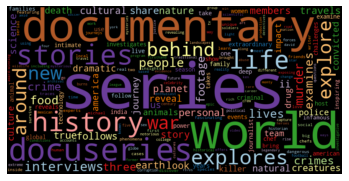

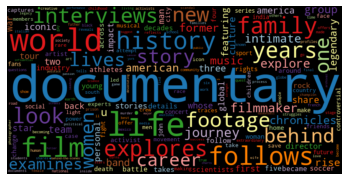

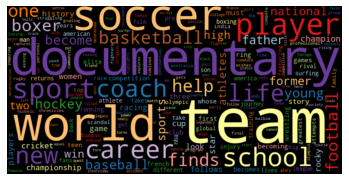

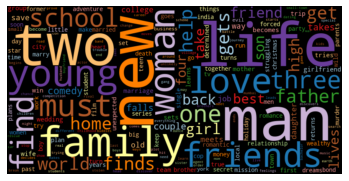

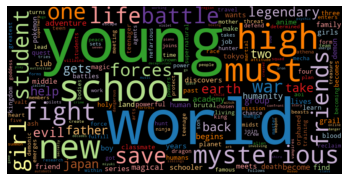

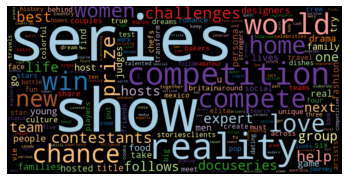

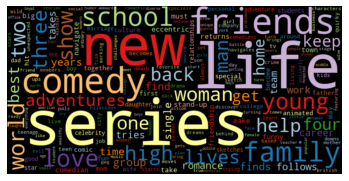

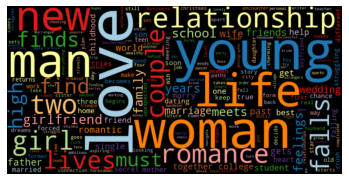

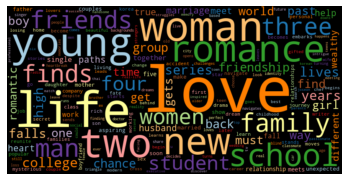

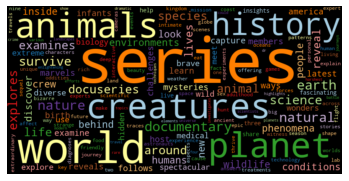

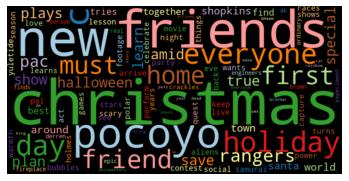

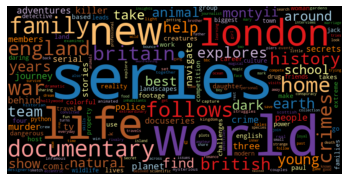

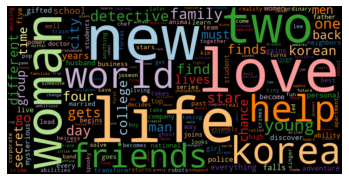

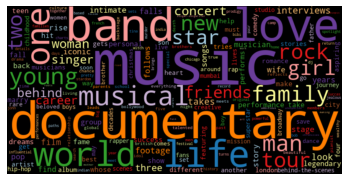

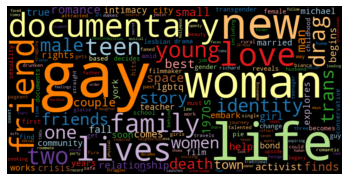

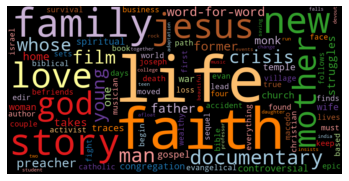

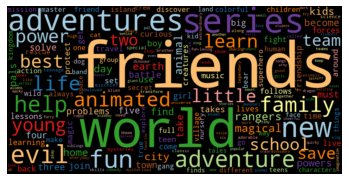

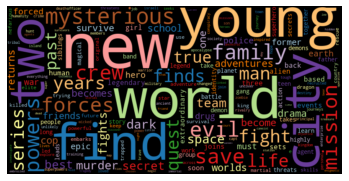

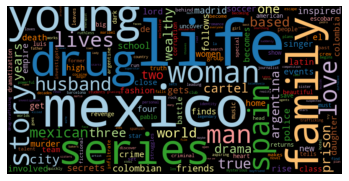

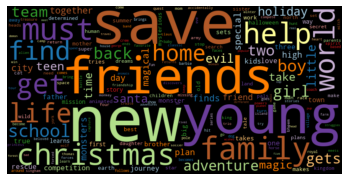

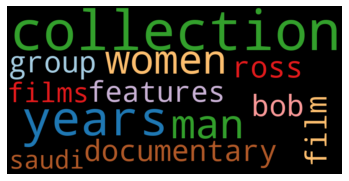

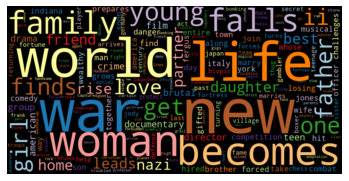

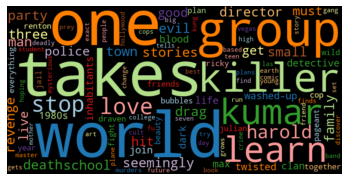

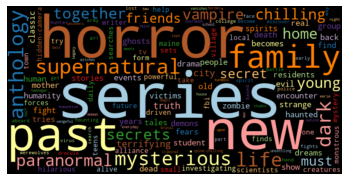

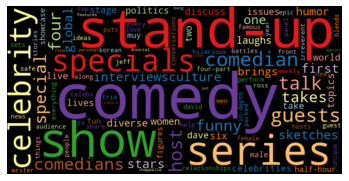

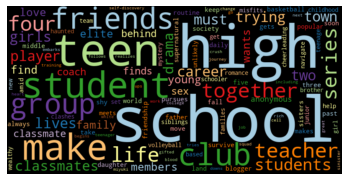

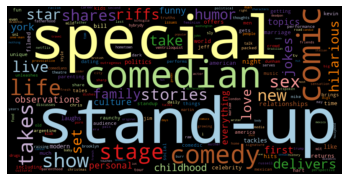

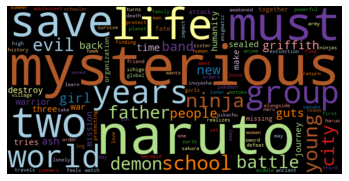

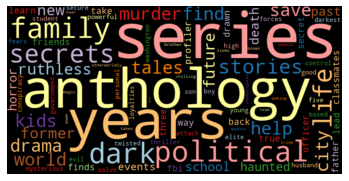

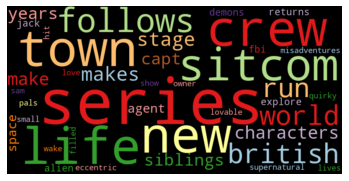

In [371]:
for genre in a.listed_in.unique():
  freq_2015_df = count_words(a[a['listed_in']== genre],column = 'description')
  wordcloud(freq_2015_df['freq'], max_words=200)
  plt.show()

###Inverse Document Frequency
The inverse document frequency (IDF) is a weighting factor that measures the “unusualness”
of a term in a corpus. It is often used to reduce the influence of common
terms for data analysis or machine learning. To explain it, let’s first define the document
frequency of a term t. Given a corpus (set of documents) C, the document frequency
d f t is simply the number of documents d in C that contain the term t.

In [368]:
a.listed_in.unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)